# Fibonacci Sequence

Iterative and recursive approaches to finding the nth number in the sequence, or returning a list of the first n members.

In [251]:
import timeit
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline

### Building a list of the Fibonacci Sequence

In [16]:
def fib_seq_concat(n):
    '''Returns list of n-length fibonacci series [0-n], concatenates list'''

    assert isinstance(n, int) and n > 0, "n must be a non-negative integer"

    if n == 0:
        return [0]
    elif n == 1:
        return [0,1]
    else:
        seq = fib_seq_concat(n-1)
        return seq + [seq[-2] + seq[-1]]

In [17]:
def fib_seq_append(n):
    '''Returns list of n-length fibonacci series [0-n], appends list'''

    assert isinstance(n, int) and n > 0, "n must be a non-negative integer"

    if n == 0:
        return [0]
    elif n == 1:
        return [0,1]
    else:
        seq = fib_seq_append(n-1)
        seq.append(seq[-2] + seq[-1])
        return seq

In [132]:
def fib_seq_iter(n):
    '''Returns list of n-length fibonacci series [0-n], iterative method'''  

    assert isinstance(n, int) and n > 0, "n must be a non-negative integer"
    
    if n == 0:
        return [0]
    else:
        seq = [0,1]
        for _ in range(1,n):
            seq.append(seq[-2] + seq[-1])
        return seq

In [135]:
n = 15

In [136]:
fib_seq_concat(n)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

In [137]:
fib_seq_append(n)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

In [138]:
fib_seq_iter(n)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

Speed check!

In [139]:
n = 10

In [140]:
%%timeit
fib_seq_concat(n)

6.17 µs ± 181 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [141]:
%%timeit
fib_seq_append(n)

5.54 µs ± 251 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [142]:
%%timeit
fib_seq_iter(n)

2.49 µs ± 161 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [143]:
n = 100

In [144]:
%%timeit
fib_seq_concat(n)

82.3 µs ± 2.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [145]:
%%timeit
fib_seq_append(n)

57.4 µs ± 796 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [146]:
%%timeit
fib_seq_iter(n)

20.3 µs ± 883 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [147]:
n = 1000

In [148]:
%%timeit
fib_seq_concat(n)

2.61 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [149]:
%%timeit
fib_seq_append(n)

678 µs ± 42.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [150]:
%%timeit
fib_seq_iter(n)

231 µs ± 5.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [152]:
n = 10000

In [153]:
%%timeit
fib_seq_iter(n)

5.28 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Append is always faster, though when n is small, it is nearly as fast as concat; by the time n grows to 1000, append is over 3x faster. When n is small, iterative is over 2x faster than recursive-append, and then almost 3x faster when n reaches 1000. Additionally, it is the only method that can handle n = 10000, as each of the other two reach max recursion depth.

### Returning the nth value of the sequence

In [155]:
def fib_val_rec(n):
    '''Returns value of nth number of series [0-n], recursive method'''

    assert isinstance(n, int) and n >= 0, "n must be a non-negative integer"
    
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib_val_rec(n-1) + fib_val_rec(n-2)

In [156]:
def fib_val_iter(n):
    '''Returns value of nth number of series [0-n], iterative method'''
    
    assert isinstance(n, int) and n >= 0, "n must be a non-negative integer"
    
    if n == 0:
        return 0
    else:
        n_0 = 0
        n_1 = 1
        for _ in range(1,n):
            n_cur = n_0 + n_1
            n_0, n_1 = n_1, n_cur
        return n_1         

In [157]:
def fib_val_list(n):
    '''Returns value of nth number of series [0-n],
    recursively builds list and pops last value'''

    assert isinstance(n, int) and n >= 0, "n must be a non-negative integer"
    
    return fib_seq_iter(n).pop()

In [166]:
n = 30

In [167]:
fib_val_rec(n)

832040

In [168]:
fib_val_iter(n)

832040

In [169]:
fib_val_list(n)

832040

Recursive method gets noticeably pokey once n hits 30. Again with some timing...

In [170]:
n = 10

In [171]:
%%timeit
fib_val_rec(n)

66.8 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [172]:
%%timeit
fib_val_iter(n)

1.42 µs ± 79 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [174]:
%%timeit
fib_val_list(n)

3.05 µs ± 419 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [196]:
n = 20

In [197]:
%%timeit
fib_val_rec(n)

8.71 ms ± 294 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [198]:
%%timeit
fib_val_iter(n)

2.29 µs ± 393 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [199]:
%%timeit
fib_val_list(n)

5.69 µs ± 398 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [192]:
n = 35

In [193]:
%%timeit
fib_val_rec(n)

11.8 s ± 347 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [194]:
%%timeit
fib_val_iter(n)

3.11 µs ± 116 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [195]:
%%timeit
fib_val_list(n)

8.05 µs ± 374 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [200]:
11800000 / 3.11

3794212.2186495177

Recursive method is already **3.79e6x faster** than the iterative method due to the fact that each recursive call spawns two more, for 0(2^n) complexity. We'll drop it for anything hereafter...

In [203]:
n = 100

In [204]:
%%timeit
fib_val_iter(n)

9.36 µs ± 569 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [205]:
%%timeit
fib_val_list(n)

22.1 µs ± 2.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [206]:
n = 1000

In [207]:
%%timeit
fib_val_iter(n)

127 µs ± 9.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [208]:
%%timeit
fib_val_list(n)

229 µs ± 6.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [209]:
n = 10000

In [210]:
%%timeit
fib_val_iter(n)

3.09 ms ± 98 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [211]:
%%timeit
fib_val_list(n)

5.13 ms ± 92.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [213]:
n = 100000

In [214]:
%%timeit
fib_val_iter(n)

152 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [215]:
%%timeit
fib_val_list(n)

651 ms ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Not surprisingly, it's faster to store two variables and calculate a single value rather than building an entire list and popping the final value. It is interesting that, while the single value method is ~3x faster for n=10 and n=100000, the gap closes to <2x at n=10000.

### Timing Visualizations

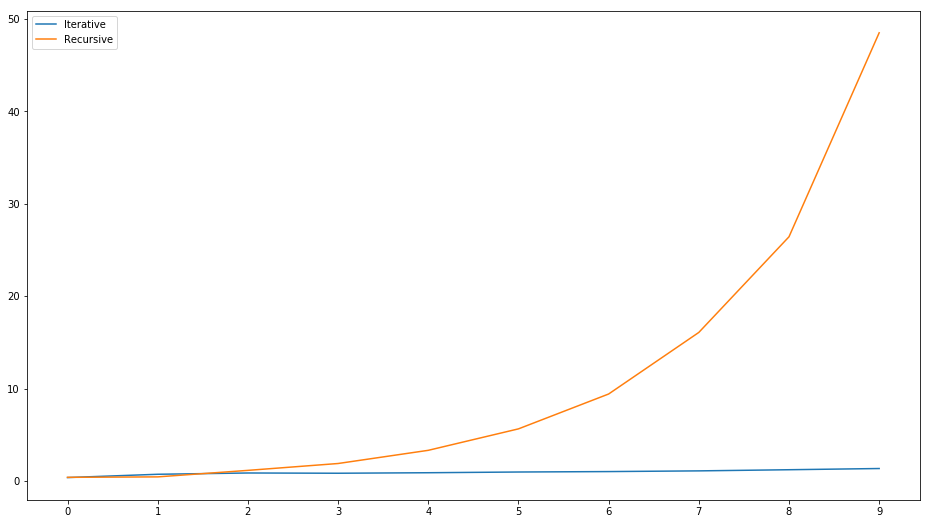

In [240]:
plt.figure(figsize=(16,9))

x = range(10)
y_iter = []
y_rec = []

for n in x:
    part_iter = partial(fib_val_iter, n)
    part_rec = partial(fib_val_rec, n)
    y_iter.append(timeit.timeit(part_iter))
    y_rec.append(timeit.timeit(part_rec))

for y, lab in zip([y_iter, y_rec], ["Iterative", "Recursive"]):
    plt.plot(x, y, label=lab)

plt.legend()
plt.xticks([n for n in x]);

''

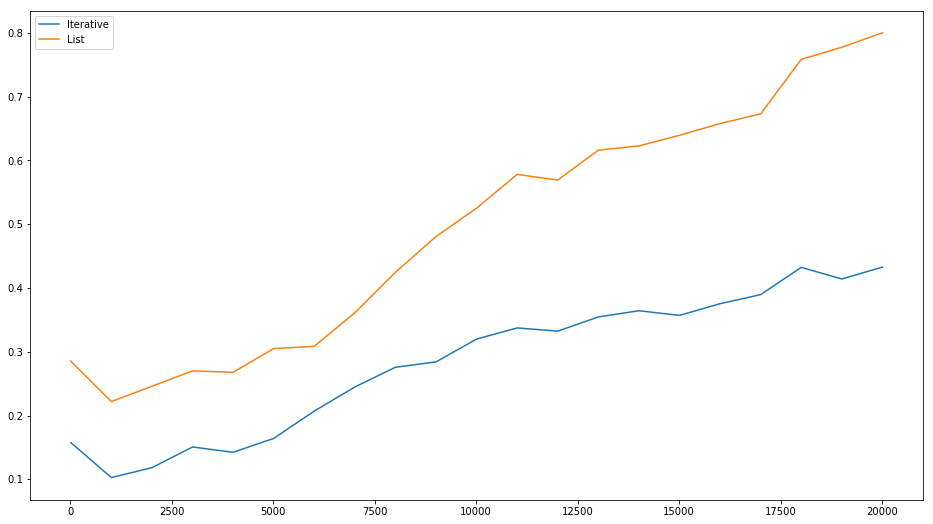

In [250]:
plt.figure(figsize=(16,9))

x = [10+x*1000 for x in range(0,21)]
y_iter = []
y_list = []

for n in x:
    part_iter = partial(fib_val_iter, n)
    part_list = partial(fib_val_list, n)
    y_iter.append(timeit.timeit(part_iter, number=int(1000000/n)))
    y_list.append(timeit.timeit(part_list, number=int(1000000/n)))

for y, lab in zip([y_iter, y_list], ["Iterative", "List"]):
    plt.plot(x, y, label=lab)

plt.legend()
#plt.xticks([n for n in x])
;